/Users/khushu/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391836761/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


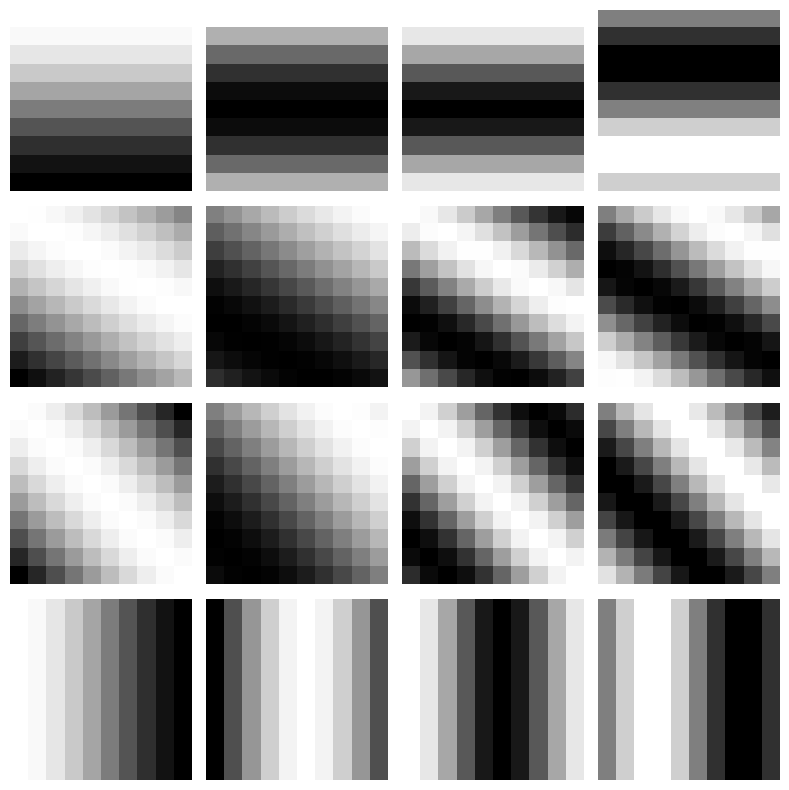

In [1]:
import torch
import math 
import numpy as np
import matplotlib.pyplot as plt

# Generate grid coordinates 
grid_size = 10
x = torch.arange(0, grid_size, dtype=torch.float) 
xx, yy = torch.meshgrid(x, x)

# Parameters
orientations = [0, 30, 45, 90] # degrees
spatial_freqs = [0.05, 0.1] 
phases = [0, np.pi / 2]  

training_patches = []

for ori in orientations:
   for freq in spatial_freqs:
      for phase in phases:
      
         # Orientation vector 
         theta = math.radians(ori)  
         R = torch.tensor([[math.cos(theta), -math.sin(theta)], 
                           [math.sin(theta), math.cos(theta)]])
         
         # Coordinate rotation 
         coords = R.matmul(torch.stack([xx.flatten(), yy.flatten()]))
         xx_rot, yy_rot = torch.reshape(coords[0,], (grid_size, grid_size)), torch.reshape(coords[1,], (grid_size, grid_size)) 
         
         # Generate 2D cosine grating
         cosine_grating = torch.cos(2*np.pi*freq*xx_rot + phase)
         
         # Append to patches  
         training_patches.append(cosine_grating) 

training_patches = torch.stack(training_patches)


# Number of images to plot
n_images = len(training_patches)

n_cols = 4 
n_rows = int(np.ceil(n_images / n_cols))
plt.figure(figsize=(2 * n_cols, 2 * n_rows))

for i in range(n_images):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(training_patches[i], cmap='gray')
    ax.axis('off') 

plt.tight_layout()
plt.show()
